

# **Introdução**

O presente projeto tem por objetivo a realização de um estudo sobre saúde e medicamentos no Brasil. Para tal, serão utilizadas bases de dados fornecidas por sites do governo federal, além dos conhecimentos adquiridos na disciplina de Introdução a Ciência dos Dados.

#**Tipo de produtos:**

Na tabela analisada neste projeto, possui os seguintes tipos de medicamento.
 

*   **Medicamento biológico** – aquele que contém molécula com atividade biológica conhecida e que tenha passado por todas as etapas de fabricação – formulação, envase, liofilização, rotulagem, embalagem, armazenamento, controle de qualidade e liberação do lote de produto biológico para uso (RDC nº 55, de 16 de dezembro de 2010).									

*   **Medicamento com princípios ativos sintéticos e semissintéticos** – Ao contrário dos medicamentos biológicos, sua molécula é sintética ou semissintética. Produto farmacêutico, tecnicamente obtido ou elaborado, com finalidade profilática, curativa, paliativa ou para fins de diagnóstico. Pode ser classificado como novo, genérico ou similar (RDC nº 60, de 10 de outubro de 2014).	

*    **Medicamento genérico** – medicamento similar a um produto de referência ou inovador, que se pretende que seja intercambiável com este, geralmente produzido após a expiração ou renúncia da proteção patentária ou de outros direitos de exclusividade, comprovada a sua eficácia, segurança e qualidade, e designado pela Denominação Comum Brasileira - DCB ou, na sua ausência, pela Denominação Comum Internacional - DCI (Lei nº 9.787, de 10 de fevereiro de 1999).

*    **Medicamento similar** – aquele que contém o mesmo ou os mesmos princípios ativos, que apresenta a mesma concentração, forma farmacêutica, via de administração, posologia e indicação terapêutica, e que é equivalente ao medicamento registrado no órgão federal responsável pela vigilância sanitária, podendo diferir somente em características relativas ao tamanho e à forma do produto, ao prazo de validade, à embalagem, à rotulagem, aos excipientes e aos veículos, devendo sempre ser identificado pelo nome comercial ou marca (Lei nº 9.787, de 10 de fevereiro de 1999).									
									
*   **Medicamento específico** – produto farmacêutico, tecnicamente obtido ou elaborado, com finalidade profilática, curativa ou paliativa, não enquadrado nas categorias de medicamento novo, genérico, similar, biológico, fitoterápico ou notificado e cuja(s) substância(s) ativa(s), independentemente da sua natureza ou origem, não é(são) passível(passíveis) de ensaio de bioequivalência frente a um produto comparador (RDC nº 24, de 14 de junho de 2011).						
									
*    **Medicamento fitoterápico** – obtidos com emprego exclusivo de matérias-primas ativas vegetais. Não se considera medicamento fitoterápico aquele que inclui na sua composição substâncias ativas isoladas, sintéticas ou naturais, nem as associações dessas com extratos vegetais.									



# **Tratamento inicial dos dados**

A seguir, serão tratados os dados obtidos pelos datasets selecionados a fim de facilitar e tornar viável o estudo.<br/>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Inicialmente, lemos as duas bases de dados obtidas.

In [3]:
datasetMedCons = pd.read_csv("/content/drive/MyDrive/Projeto/Dados/med.csv", encoding='iso8859-1', sep = ';', on_bad_lines='skip')
datasetMedCons

,TIPO_PRODUTO,NOME_PRODUTO,DATA_FINALIZACAO_PROCESSO,CATEGORIA_REGULATORIA,NUMERO_REGISTRO_PRODUTO,DATA_VENCIMENTO_REGISTRO,NUMERO_PROCESSO,CLASSE_TERAPEUTICA,EMPRESA_DETENTORA_REGISTRO,SITUACAO_REGISTRO,PRINCIPIO_ATIVO
0,MEDICAMENTO,(VITAMINAS A ) + ASSSOCIACÕES,25/04/2000,SIMILAR,104540166,01/04/2005,25000025416,VITAMINAS E SUPLEMENTOS MINERAIS,60874187000184 - DAIICHI SANKYO BRASIL FARMACÊ...,CADUCO/CANCELADO,NaN
1,MEDICAMENTO,AC SALICILICO + AC BENZOICO + IODO,19/05/2000,SIMILAR,119350001,01/05/2005,25010171858,ANTIMICOTICOS PARA USO TOPICO,63826069000199 - LABORATORIO FLORA DA AMAZONIA...,CADUCO/CANCELADO,NaN
2,MEDICAMENTO,ALENDRONATO SODICO,04/06/2001,SIMILAR,100470305,01/05/2006,25351022805,SUPRESSORES DA REABSORCAO OSSEA,61286647000116 - SANDOZ DO BRASIL INDÚSTRIA FA...,CADUCO/CANCELADO,NaN
3,MEDICAMENTO,ARNICA MONTANA,19/03/2002,FITOTERÁPICO,104730021,01/03/2007,25025007821,FITOTERAPICO SIMPLES,92762277000170 - VIDORA FARMACÊUTICA LTDA,CADUCO/CANCELADO,NaN
4,MEDICAMENTO,ARNICA MONTANA L.,01/07/2002,FITOTERÁPICO,131750004,01/06/2007,25351032631,FITOTERAPICO SIMPLES,00925697000101 - LIMED LABORATORIO INDUSTRIAL ...,CADUCO/CANCELADO,NaN
...,...,...,...,...,...,...,...,...,...,...,...
29715,MEDICAMENTO,nimesulida,NaN,GENÉRICO,177940051,01/06/2032,25351222835,AGENTES ANTI-INFLAMATÓRIOS,09545589000188 - MABRA FARMACEUTICA LTDA,VÁLIDO,NIMESULIDA
29716,MEDICAMENTO,pantoprazol sódico sesqui-hidratado,NaN,GENÉRICO,100431438,01/06/2032,25351538852,ANTIACIDOS E ANTIULCEROSOS,61190096000192 - EUROFARMA LABORATÓRIOS S.A.,VÁLIDO,PANTOPRAZOL SÓDICO SESQUI-HIDRATADO
29717,MEDICAMENTO,paracetamol + cafeína,NaN,GENÉRICO,177940052,01/06/2032,25351239745,ANALGESICOS NAO NARCOTICOS,09545589000188 - MABRA FARMACEUTICA LTDA,VÁLIDO,CAFEÍNA ANIDRA + PARACETAMOL
29718,MEDICAMENTO,prednisolona,NaN,GENÉRICO,155840631,01/06/2032,25351544442,GLICOCORTICOIDES SISTEMICOS,05161069000110 - BRAINFARMA INDÚSTRIA QUÍMICA ...,VÁLIDO,FOSFATO SÓDICO DE PREDNISOLONA + PREDNISOLONA


In [4]:
pip install xlrd==1.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 103 kB 6.9 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [5]:
datasetMed = pd.read_excel("/content/drive/MyDrive/Projeto/Dados/medTarja.xls", index_col=None, header=45, skiprows = [0, 45])
datasetMed

,SUBSTÂNCIA,CNPJ,LABORATÓRIO,CÓDIGO GGREM,REGISTRO,EAN 1,EAN 2,EAN 3,PRODUTO,APRESENTAÇÃO,...,PMC 18% ALC,PMC 20%,RESTRIÇÃO HOSPITALAR,CAP,CONFAZ 87,ICMS 0%,ANÁLISE RECURSAL,LISTA DE CONCESSÃO DE CRÉDITO TRIBUTÁRIO (PIS/COFINS),COMERCIALIZAÇÃO 2020,TARJA
0,CEFALOTINA SODICA,04.301.884/0001-75,AUROBINDO PHARMA INDÚSTRIA FARMACÊUTICA LIMITADA,500100106155118,1516700060050,7898361881450,-,-,CEFALOTINA SÓDICA,1G PO SOL INJ CT 50 FA VD TRANS,...,NaN,NaN,Sim,Não,Não,Não,NaN,Positiva,Sim,Tarja Vermelha (*)
1,CEFAZOLINA SÓDICA,04.301.884/0001-75,AUROBINDO PHARMA INDÚSTRIA FARMACÊUTICA LIMITADA,500100204157115,1516700030038,7898361881405,-,-,CEFAZOLINA SÓDICA,1 G PO SOL INJ CT 50 FA VD TRANS,...,NaN,NaN,Sim,Não,Não,Não,NaN,Positiva,Sim,Tarja Vermelha (*)
2,CEFOTAXIMA SÓDICA,04.301.884/0001-75,AUROBINDO PHARMA INDÚSTRIA FARMACÊUTICA LIMITADA,500100310151117,1516700050063,7898361881412,-,-,CEFOTAXIMA SÓDICA,1 G PO SOL INJ CT 50 FA VD TRANS,...,NaN,NaN,Sim,Não,Não,Não,NaN,Positiva,Sim,Tarja Vermelha (*)
3,CLORIDRATO DE CIPROFLOXACINO,04.301.884/0001-75,AUROBINDO PHARMA INDÚSTRIA FARMACÊUTICA LIMITADA,500100410113111,1516700070099,7898361881313,-,-,CLORIDRATO DE CIPROFLOXACINO,500 MG COM REV CT 2 BL AL PLAS TRANS X 07,...,"46,26","47,42",Não,Não,Sim,Não,NaN,Positiva,Não,Tarja Vermelha (*)
4,CEFALEXINA MONOIDRATADA,04.301.884/0001-75,AUROBINDO PHARMA INDÚSTRIA FARMACÊUTICA LIMITADA,500100801112111,1516700080035,7898361880019,-,-,CEFALEXINA,500 MG COM REV CT BL AL PVC/PVDC TRANS X 8,...,"20,97","21,50",Não,Não,Não,Não,NaN,Positiva,Sim,Tarja Vermelha (*)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27192,ACETATO DE RETINOL;COLECALCIFEROL,92.265.552/0001-40,MULTILAB INDÚSTRIA E COMÉRCIO DE PRODUTOS FARM...,525917060050504,1181901840031,7896472518821,-,-,METOSAD,50000 + 10000 UI/ML SOL OR CT FR PLAS AMB GOT ...,...,"27,91","31,83",Não,Não,Não,Não,NaN,Negativa,Não,- (*)
27193,ACETATO DE DEXAMETASONA,92.265.552/0001-40,MULTILAB INDÚSTRIA E COMÉRCIO DE PRODUTOS FARM...,525921120068107,1181902220010,7896472503599,7895296449267,-,ACETATO DE DEXAMETASONA,1 MG/G CREM DERM CT BG AL X 10 G,...,"12,30","12,62",Não,Não,Não,Não,NaN,Positiva,Não,- (*)
27194,ACETATO DE DEXAMETASONA,92.265.552/0001-40,MULTILAB INDÚSTRIA E COMÉRCIO DE PRODUTOS FARM...,525921120067907,1181902240011,7896472502110,7896004782560,-,CORTITOP,1 MG/G CREM DERM CT BG AL X 10 G,...,"19,05","19,53",Não,Não,Não,Não,NaN,Positiva,Não,- (*)
27195,ACETATO DE DEXAMETASONA,92.265.552/0001-40,MULTILAB INDÚSTRIA E COMÉRCIO DE PRODUTOS FARM...,525922030071603,1181902240021,7896004782225,-,-,CORTITOP,1 MG/G CREM DERM CT BG AL X 20 G,...,"37,92","38,86",Não,Não,Não,Não,NaN,Positiva,Não,- (*)


Após tendo as bases de dados lidas, realizamos os devidos tratamentos. As operações a seguir terão como objetivo a exclusão de linhas com dados faltantes, para que facilite durante as análises mais a frente.<br/>
Removeremos as colunas EAN 2, EAN 3 e Análise Recursal pois as mesmas raramente possuem valores.

In [6]:
datasetMed.drop('EAN 2', inplace=True, axis=1)
datasetMed.drop('EAN 3', inplace=True, axis=1)
datasetMed.drop('ANÁLISE RECURSAL', inplace=True, axis=1)
datasetMed

,SUBSTÂNCIA,CNPJ,LABORATÓRIO,CÓDIGO GGREM,REGISTRO,EAN 1,PRODUTO,APRESENTAÇÃO,CLASSE TERAPÊUTICA,TIPO DE PRODUTO (STATUS DO PRODUTO),...,PMC 18%,PMC 18% ALC,PMC 20%,RESTRIÇÃO HOSPITALAR,CAP,CONFAZ 87,ICMS 0%,LISTA DE CONCESSÃO DE CRÉDITO TRIBUTÁRIO (PIS/COFINS),COMERCIALIZAÇÃO 2020,TARJA
0,CEFALOTINA SODICA,04.301.884/0001-75,AUROBINDO PHARMA INDÚSTRIA FARMACÊUTICA LIMITADA,500100106155118,1516700060050,7898361881450,CEFALOTINA SÓDICA,1G PO SOL INJ CT 50 FA VD TRANS,J1D2 - CEFALOSPORINAS INJETÁVEIS,Genérico,...,NaN,NaN,NaN,Sim,Não,Não,Não,Positiva,Sim,Tarja Vermelha (*)
1,CEFAZOLINA SÓDICA,04.301.884/0001-75,AUROBINDO PHARMA INDÚSTRIA FARMACÊUTICA LIMITADA,500100204157115,1516700030038,7898361881405,CEFAZOLINA SÓDICA,1 G PO SOL INJ CT 50 FA VD TRANS,J1D2 - CEFALOSPORINAS INJETÁVEIS,Genérico,...,NaN,NaN,NaN,Sim,Não,Não,Não,Positiva,Sim,Tarja Vermelha (*)
2,CEFOTAXIMA SÓDICA,04.301.884/0001-75,AUROBINDO PHARMA INDÚSTRIA FARMACÊUTICA LIMITADA,500100310151117,1516700050063,7898361881412,CEFOTAXIMA SÓDICA,1 G PO SOL INJ CT 50 FA VD TRANS,J1D2 - CEFALOSPORINAS INJETÁVEIS,Genérico,...,NaN,NaN,NaN,Sim,Não,Não,Não,Positiva,Sim,Tarja Vermelha (*)
3,CLORIDRATO DE CIPROFLOXACINO,04.301.884/0001-75,AUROBINDO PHARMA INDÚSTRIA FARMACÊUTICA LIMITADA,500100410113111,1516700070099,7898361881313,CLORIDRATO DE CIPROFLOXACINO,500 MG COM REV CT 2 BL AL PLAS TRANS X 07,J1G1 - FLUORQUINOLONAS ORAIS,Genérico,...,"46,26","46,26","47,42",Não,Não,Sim,Não,Positiva,Não,Tarja Vermelha (*)
4,CEFALEXINA MONOIDRATADA,04.301.884/0001-75,AUROBINDO PHARMA INDÚSTRIA FARMACÊUTICA LIMITADA,500100801112111,1516700080035,7898361880019,CEFALEXINA,500 MG COM REV CT BL AL PVC/PVDC TRANS X 8,J1D1 - CEFALOSPORINAS ORAIS,Genérico,...,"20,97","20,97","21,50",Não,Não,Não,Não,Positiva,Sim,Tarja Vermelha (*)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27192,ACETATO DE RETINOL;COLECALCIFEROL,92.265.552/0001-40,MULTILAB INDÚSTRIA E COMÉRCIO DE PRODUTOS FARM...,525917060050504,1181901840031,7896472518821,METOSAD,50000 + 10000 UI/ML SOL OR CT FR PLAS AMB GOT ...,A11C3 - ASSOCIAÇÕES VITAMINAS A COM D,-,...,"30,95","27,91","31,83",Não,Não,Não,Não,Negativa,Não,- (*)
27193,ACETATO DE DEXAMETASONA,92.265.552/0001-40,MULTILAB INDÚSTRIA E COMÉRCIO DE PRODUTOS FARM...,525921120068107,1181902220010,7896472503599,ACETATO DE DEXAMETASONA,1 MG/G CREM DERM CT BG AL X 10 G,D7A - CORTICOESTERÓIDES TÓPICOS PUROS,Genérico,...,"12,30","12,30","12,62",Não,Não,Não,Não,Positiva,Não,- (*)
27194,ACETATO DE DEXAMETASONA,92.265.552/0001-40,MULTILAB INDÚSTRIA E COMÉRCIO DE PRODUTOS FARM...,525921120067907,1181902240011,7896472502110,CORTITOP,1 MG/G CREM DERM CT BG AL X 10 G,D7A - CORTICOESTERÓIDES TÓPICOS PUROS,Similar,...,"19,05","19,05","19,53",Não,Não,Não,Não,Positiva,Não,- (*)
27195,ACETATO DE DEXAMETASONA,92.265.552/0001-40,MULTILAB INDÚSTRIA E COMÉRCIO DE PRODUTOS FARM...,525922030071603,1181902240021,7896004782225,CORTITOP,1 MG/G CREM DERM CT BG AL X 20 G,D7A - CORTICOESTERÓIDES TÓPICOS PUROS,Similar,...,"37,92","37,92","38,86",Não,Não,Não,Não,Positiva,Não,- (*)


In [7]:
datasetMedCons['NOME_PRODUTO'] = datasetMedCons['NOME_PRODUTO'].str.upper()

**Convertendo os dados para tipo numérico**

In [8]:
datasetMed['PMC 17%'] = datasetMed['PMC 17%'].str.replace(',', '.')
datasetMed['PMC 18%'] = datasetMed['PMC 18%'].str.replace(',', '.')
datasetMed['PMC 20%'] = datasetMed['PMC 20%'].str.replace(',', '.')
datasetMed['PF 0%'] = datasetMed['PF 0%'].str.replace(',', '.')

datasetMed['PMC 17%'] = datasetMed['PMC 17%'].astype(float)
datasetMed['PMC 18%'] = datasetMed['PMC 18%'].astype(float)
datasetMed['PMC 20%'] = datasetMed['PMC 20%'].astype(float)
datasetMed['PF 0%'] = datasetMed['PF 0%'].astype(float)

datasetMed

,SUBSTÂNCIA,CNPJ,LABORATÓRIO,CÓDIGO GGREM,REGISTRO,EAN 1,PRODUTO,APRESENTAÇÃO,CLASSE TERAPÊUTICA,TIPO DE PRODUTO (STATUS DO PRODUTO),...,PMC 18%,PMC 18% ALC,PMC 20%,RESTRIÇÃO HOSPITALAR,CAP,CONFAZ 87,ICMS 0%,LISTA DE CONCESSÃO DE CRÉDITO TRIBUTÁRIO (PIS/COFINS),COMERCIALIZAÇÃO 2020,TARJA
0,CEFALOTINA SODICA,04.301.884/0001-75,AUROBINDO PHARMA INDÚSTRIA FARMACÊUTICA LIMITADA,500100106155118,1516700060050,7898361881450,CEFALOTINA SÓDICA,1G PO SOL INJ CT 50 FA VD TRANS,J1D2 - CEFALOSPORINAS INJETÁVEIS,Genérico,...,NaN,NaN,NaN,Sim,Não,Não,Não,Positiva,Sim,Tarja Vermelha (*)
1,CEFAZOLINA SÓDICA,04.301.884/0001-75,AUROBINDO PHARMA INDÚSTRIA FARMACÊUTICA LIMITADA,500100204157115,1516700030038,7898361881405,CEFAZOLINA SÓDICA,1 G PO SOL INJ CT 50 FA VD TRANS,J1D2 - CEFALOSPORINAS INJETÁVEIS,Genérico,...,NaN,NaN,NaN,Sim,Não,Não,Não,Positiva,Sim,Tarja Vermelha (*)
2,CEFOTAXIMA SÓDICA,04.301.884/0001-75,AUROBINDO PHARMA INDÚSTRIA FARMACÊUTICA LIMITADA,500100310151117,1516700050063,7898361881412,CEFOTAXIMA SÓDICA,1 G PO SOL INJ CT 50 FA VD TRANS,J1D2 - CEFALOSPORINAS INJETÁVEIS,Genérico,...,NaN,NaN,NaN,Sim,Não,Não,Não,Positiva,Sim,Tarja Vermelha (*)
3,CLORIDRATO DE CIPROFLOXACINO,04.301.884/0001-75,AUROBINDO PHARMA INDÚSTRIA FARMACÊUTICA LIMITADA,500100410113111,1516700070099,7898361881313,CLORIDRATO DE CIPROFLOXACINO,500 MG COM REV CT 2 BL AL PLAS TRANS X 07,J1G1 - FLUORQUINOLONAS ORAIS,Genérico,...,46.26,"46,26",47.42,Não,Não,Sim,Não,Positiva,Não,Tarja Vermelha (*)
4,CEFALEXINA MONOIDRATADA,04.301.884/0001-75,AUROBINDO PHARMA INDÚSTRIA FARMACÊUTICA LIMITADA,500100801112111,1516700080035,7898361880019,CEFALEXINA,500 MG COM REV CT BL AL PVC/PVDC TRANS X 8,J1D1 - CEFALOSPORINAS ORAIS,Genérico,...,20.97,"20,97",21.50,Não,Não,Não,Não,Positiva,Sim,Tarja Vermelha (*)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27192,ACETATO DE RETINOL;COLECALCIFEROL,92.265.552/0001-40,MULTILAB INDÚSTRIA E COMÉRCIO DE PRODUTOS FARM...,525917060050504,1181901840031,7896472518821,METOSAD,50000 + 10000 UI/ML SOL OR CT FR PLAS AMB GOT ...,A11C3 - ASSOCIAÇÕES VITAMINAS A COM D,-,...,30.95,"27,91",31.83,Não,Não,Não,Não,Negativa,Não,- (*)
27193,ACETATO DE DEXAMETASONA,92.265.552/0001-40,MULTILAB INDÚSTRIA E COMÉRCIO DE PRODUTOS FARM...,525921120068107,1181902220010,7896472503599,ACETATO DE DEXAMETASONA,1 MG/G CREM DERM CT BG AL X 10 G,D7A - CORTICOESTERÓIDES TÓPICOS PUROS,Genérico,...,12.30,"12,30",12.62,Não,Não,Não,Não,Positiva,Não,- (*)
27194,ACETATO DE DEXAMETASONA,92.265.552/0001-40,MULTILAB INDÚSTRIA E COMÉRCIO DE PRODUTOS FARM...,525921120067907,1181902240011,7896472502110,CORTITOP,1 MG/G CREM DERM CT BG AL X 10 G,D7A - CORTICOESTERÓIDES TÓPICOS PUROS,Similar,...,19.05,"19,05",19.53,Não,Não,Não,Não,Positiva,Não,- (*)
27195,ACETATO DE DEXAMETASONA,92.265.552/0001-40,MULTILAB INDÚSTRIA E COMÉRCIO DE PRODUTOS FARM...,525922030071603,1181902240021,7896004782225,CORTITOP,1 MG/G CREM DERM CT BG AL X 20 G,D7A - CORTICOESTERÓIDES TÓPICOS PUROS,Similar,...,37.92,"37,92",38.86,Não,Não,Não,Não,Positiva,Não,- (*)


# **Análises**

### **Utils**

In [9]:
#Colunas do dataset
datasetMed.columns

Index(['SUBSTÂNCIA', 'CNPJ', 'LABORATÓRIO', 'CÓDIGO GGREM', 'REGISTRO',
       'EAN 1', 'PRODUTO', 'APRESENTAÇÃO', 'CLASSE TERAPÊUTICA',
       'TIPO DE PRODUTO (STATUS DO PRODUTO)', 'REGIME DE PREÇO',
       'PF Sem Impostos', 'PF 0%', 'PF 12%', 'PF 17%', 'PF 17% ALC',
       'PF 17,5%', 'PF 17,5% ALC', 'PF 18%', 'PF 18% ALC', 'PF 20%', 'PMC 0%',
       'PMC 12%', 'PMC 17%', 'PMC 17% ALC', 'PMC 17,5%', 'PMC 17,5% ALC',
       'PMC 18%', 'PMC 18% ALC', 'PMC 20%', 'RESTRIÇÃO HOSPITALAR', 'CAP',
       'CONFAZ 87', 'ICMS 0%',
       'LISTA DE CONCESSÃO DE CRÉDITO TRIBUTÁRIO (PIS/COFINS)',
       'COMERCIALIZAÇÃO 2020', 'TARJA'],
      dtype='object')

É importante citar algumas notas presentes no dataset usado.

As alícotas são um percentual usado para calcular o valor final de um imposto que deve ser pago por uma pessoa física ou jurídica. No Brasil, cada estado tem sua própria alíquota:

*   ICMS 20% - RJ
*   ICMS 18% - AM, BA, CE, MA, MG, PB, PE, PI, PR, RN, SE, SP.
*   ICMS 17,5% - RO e RO.





###**1)** Quais os nomes dos remédios autorizados no Brasil?

In [10]:
nomesRemedios = datasetMedCons['NOME_PRODUTO'].unique()
print('\n'.join(nomesRemedios))

 (VITAMINAS A )  +  ASSSOCIACÕES
 AC SALICILICO + AC BENZOICO + IODO
 ALENDRONATO SODICO
 ARNICA MONTANA
 ARNICA MONTANA L.
 BUPIVACAINA + EPINEFRINA
 CETOCONAZOL
 CLORETO DE CETILPIRIDINIO + BENZOCAINA
 CLORETO DE SODIO
 CLORIDRATO DE DOBUTAMINA  ( EQUIV. A 25 MG DE DOBUT. BASE)
 DIPIRONA
 EUCALYPTUS GLOBULUS  LABILL.
 GINKGO BILOBA
 HEPARINA + HIALURONIDASE + LIDOCAINA
 HYPERICUM PERFORATUM
 HYPERICUM PERFORATUM L
 IMUNOCIANINA
 IODETO DE POTASSIO
 KAVA KAVA
 METILDOPA
 NISTATINA
 RABEPRAZOL SODICO
 SULFATO DE AMICACINA
 TAMOXIFENO
 TENOXICAM
 TERBINAFINA
 VACINA CONTRA SARAMPO, CAXUMBA E RUBEOLA
 VITAMINA C + ASSOCIAÇÕES
1/6 MOLAR HALEX ISTAR
17-VALERATO DE BETAMETASONA + ACIDO SALICILICO
17-VALERATO DE BETAMETASONA+ASSOCIASSOES
21 - ACETATO DE DEXAMETAZONA VIT B1, VIT B6 E VIT B 12
50 + MULTIVITAMÍNICO
6 - COPENA
A CURITYBINA
A SAUDE DA MULHER
A SAÚDE DA MULHER
A.F.B.M
AAS
AAS PROTECT
ABACICLOVIR
ABBA
ABBOT EFEDRINA
ABBOTTRACURIUM
ABC
ABC PLUS
ABCALCIUM B12
ABCIXIMAB
ABCLER ABNAT
A

###**2)** Qual a quantidade de remédios fornecidos por laboratório?

In [11]:
quantidade = datasetMed
quantidade = quantidade.groupby('LABORATÓRIO')['SUBSTÂNCIA'].count().tolist()

In [12]:
nomesLabs = sorted(datasetMed['LABORATÓRIO'].unique())
nomesLabs
lab_quantidade = pd.DataFrame({'Laboratório': nomesLabs,
                   'Quantidade': quantidade})
lab_quantidade

,Laboratório,Quantidade
0,1FARMA INDUSTRIA FARMACEUTICA LTDA,108
1,ABBOTT LABORATÓRIOS DO BRASIL LTDA,234
2,ABBVIE FARMACÊUTICA LTDA.,36
3,ACCORD FARMACÊUTICA LTDA,292
4,ACHÉ LABORATÓRIOS FARMACÊUTICOS S.A,1183
...,...,...
266,WASSER FARMA LTDA,3
267,WYETH INDÚSTRIA FARMACÊUTICA LTDA,269
268,ZAMBON LABORATÓRIOS FARMACÊUTICOS LTDA.,50
269,ZODIAC PRODUTOS FARMACÊUTICOS S/A,194


###**3)** Qual laboratório possui maior quantidade de remédios autorizados?

In [13]:
lab_mais_remedios = lab_quantidade.sort_values(by='Quantidade', ascending=False)
lab_mais_remedios.head(1)

,Laboratório,Quantidade
80,EMS S/A,1574


### **4)** Qual a quantidade de remédios por tipo de tarja?

In [14]:
tarjas = datasetMed['TARJA'].unique()
tarjas

array(['Tarja Vermelha (*)', 'Tarja Vermelha(*)', 'Tarja Preta(*)',
       'Tarja  Vermelha', 'Tarja  Preta',
       'Tarja Venda Livre/Sem Tarja (*)', 'Tarja Venda Livre',
       'Tarja -(*)', '- (*) ', 'Tarja Vermelha', 'Tarja Sem Tarja',
       'Tarja Vermelha sob restrição'], dtype=object)

**Tratamento das Tarjas**<br/>
<p>Como é possível ver, existe mais de uma ocorrência para um mesmo tipo de tarja, sendo estas diferenciadas apenas por um espaço espaço a mais ou a menos. Sendo assim, esses valores devem ser tratados para que sejam únicos.</p>

In [15]:
def map_tarjas(tarja):
  if tarja in ['Tarja Vermelha (*)','Tarja Vermelha(*)','Tarja  Vermelha', 'Tarja Vermelha', 'Tarja Vermelha sob restrição']:
    return 'Tarja Vermelha'
  if tarja in ['Tarja Preta(*)','Tarja  Preta']:
    return 'Tarja Preta'
  if tarja in ['Tarja Venda Livre/Sem Tarja (*)', 'Tarja Venda Livre', 'Tarja -(*)', '- (*) ','Tarja Sem Tarja']:
    return 'Sem Tarja'

datasetMed['TARJA'] = datasetMed['TARJA'].apply(map_tarjas)

In [16]:
datasetMed['TARJA'].unique()

array(['Tarja Vermelha', 'Tarja Preta', 'Sem Tarja'], dtype=object)

**Com os dados tratados, podemos seguir com a análise.**

In [17]:
quantidade_tarja = datasetMed
quantidade_tarja = quantidade_tarja.groupby('TARJA')['TARJA'].count()
quantidade_tarja

TARJA
Sem Tarja          4712
Tarja Preta         551
Tarja Vermelha    21934
Name: TARJA, dtype: int64

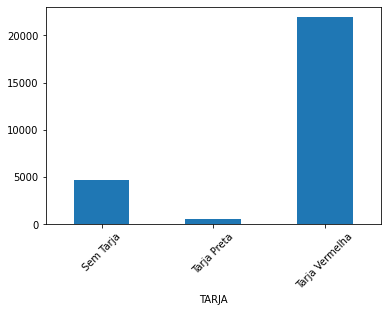

In [18]:
quantidade_tarja.plot.bar()
plt.xticks(rotation = 45)
plt.show()

### **5)** Qual a média do preço ao consumidor em cada estado do sudeste (MG/SP 18%; RJ 20%; ES 17%)?

**Tratamento dos dados**
<p>Primeiramente, temos que remover todas as linhas cujas colunas PMC 17%, 18% ou 20% são nulas. Isso será necessário para que não haja viés na média calculada, mesmo perdendo parte dos dados.</p>

In [19]:
dfDatasetMed = datasetMed
dfDatasetMed = dfDatasetMed[dfDatasetMed['PMC 17%'].notna()]
dfDatasetMed = dfDatasetMed[dfDatasetMed['PMC 18%'].notna()]
dfDatasetMed = dfDatasetMed[dfDatasetMed['PMC 20%'].notna()]
dfDatasetMed

,SUBSTÂNCIA,CNPJ,LABORATÓRIO,CÓDIGO GGREM,REGISTRO,EAN 1,PRODUTO,APRESENTAÇÃO,CLASSE TERAPÊUTICA,TIPO DE PRODUTO (STATUS DO PRODUTO),...,PMC 18%,PMC 18% ALC,PMC 20%,RESTRIÇÃO HOSPITALAR,CAP,CONFAZ 87,ICMS 0%,LISTA DE CONCESSÃO DE CRÉDITO TRIBUTÁRIO (PIS/COFINS),COMERCIALIZAÇÃO 2020,TARJA
3,CLORIDRATO DE CIPROFLOXACINO,04.301.884/0001-75,AUROBINDO PHARMA INDÚSTRIA FARMACÊUTICA LIMITADA,500100410113111,1516700070099,7898361881313,CLORIDRATO DE CIPROFLOXACINO,500 MG COM REV CT 2 BL AL PLAS TRANS X 07,J1G1 - FLUORQUINOLONAS ORAIS,Genérico,...,46.26,"46,26",47.42,Não,Não,Sim,Não,Positiva,Não,Tarja Vermelha
4,CEFALEXINA MONOIDRATADA,04.301.884/0001-75,AUROBINDO PHARMA INDÚSTRIA FARMACÊUTICA LIMITADA,500100801112111,1516700080035,7898361880019,CEFALEXINA,500 MG COM REV CT BL AL PVC/PVDC TRANS X 8,J1D1 - CEFALOSPORINAS ORAIS,Genérico,...,20.97,"20,97",21.50,Não,Não,Não,Não,Positiva,Sim,Tarja Vermelha
11,CLORIDRATO DE METFORMINA,04.301.884/0001-75,AUROBINDO PHARMA INDÚSTRIA FARMACÊUTICA LIMITADA,500101402114119,1516700150017,7898361882655,CLORIDRATO DE METFORMINA,500 MG COM REV CT BL AL PLAS TRANS X 30,A10J1 - ANTIDIABÉTICOS BIGUANIDAS PUROS,Genérico,...,13.51,"13,51",13.84,Não,Não,Não,Não,Positiva,Não,Tarja Vermelha
12,CLORIDRATO DE METFORMINA,04.301.884/0001-75,AUROBINDO PHARMA INDÚSTRIA FARMACÊUTICA LIMITADA,500101404117115,1516700150033,7898361882662,CLORIDRATO DE METFORMINA,850 MG COM REV CT BL AL PLAS TRANS X 30,A10J1 - ANTIDIABÉTICOS BIGUANIDAS PUROS,Genérico,...,18.21,"18,21",18.66,Não,Não,Não,Não,Positiva,Sim,Tarja Vermelha
14,BROMIDRATO DE CITALOPRAM,04.301.884/0001-75,AUROBINDO PHARMA INDÚSTRIA FARMACÊUTICA LIMITADA,500102202119115,1516700180031,7898361881863,BROMIDRATO DE CITALOPRAM,20 MG COM REV CT BL AL PVC/PVDC TRANS X 28,N6A4 - ANTIDEPRESSIVOS SSRI,Genérico,...,73.50,"73,50",75.34,Não,Não,Não,Não,Positiva,Não,Tarja Preta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27192,ACETATO DE RETINOL;COLECALCIFEROL,92.265.552/0001-40,MULTILAB INDÚSTRIA E COMÉRCIO DE PRODUTOS FARM...,525917060050504,1181901840031,7896472518821,METOSAD,50000 + 10000 UI/ML SOL OR CT FR PLAS AMB GOT ...,A11C3 - ASSOCIAÇÕES VITAMINAS A COM D,-,...,30.95,"27,91",31.83,Não,Não,Não,Não,Negativa,Não,Sem Tarja
27193,ACETATO DE DEXAMETASONA,92.265.552/0001-40,MULTILAB INDÚSTRIA E COMÉRCIO DE PRODUTOS FARM...,525921120068107,1181902220010,7896472503599,ACETATO DE DEXAMETASONA,1 MG/G CREM DERM CT BG AL X 10 G,D7A - CORTICOESTERÓIDES TÓPICOS PUROS,Genérico,...,12.30,"12,30",12.62,Não,Não,Não,Não,Positiva,Não,Sem Tarja
27194,ACETATO DE DEXAMETASONA,92.265.552/0001-40,MULTILAB INDÚSTRIA E COMÉRCIO DE PRODUTOS FARM...,525921120067907,1181902240011,7896472502110,CORTITOP,1 MG/G CREM DERM CT BG AL X 10 G,D7A - CORTICOESTERÓIDES TÓPICOS PUROS,Similar,...,19.05,"19,05",19.53,Não,Não,Não,Não,Positiva,Não,Sem Tarja
27195,ACETATO DE DEXAMETASONA,92.265.552/0001-40,MULTILAB INDÚSTRIA E COMÉRCIO DE PRODUTOS FARM...,525922030071603,1181902240021,7896004782225,CORTITOP,1 MG/G CREM DERM CT BG AL X 20 G,D7A - CORTICOESTERÓIDES TÓPICOS PUROS,Similar,...,37.92,"37,92",38.86,Não,Não,Não,Não,Positiva,Não,Sem Tarja


**Observamos a porcentagem de perda de dados**

In [20]:
original= len(datasetMed.index)
novo = len(dfDatasetMed.index)
print("Antes: ",original, "\nDepois:",novo)

Antes:  27197 
Depois: 22376


In [21]:
perda = (len(dfDatasetMed.index * 100)/len(datasetMed.index))
print(round(perda,2),"%")

0.82 %


**Realizando a análise sobre os dados**

In [22]:
ES = int(datasetMed['PMC 17%'].mean())
MGSP = int(datasetMed['PMC 18%'].mean())
RJ = int(datasetMed['PMC 20%'].mean())
print(ES, MGSP, RJ)

estadosMedia = pd.DataFrame({'Estado': ["ES", "MGSP", "RJ"],'Média':[ES, MGSP, RJ]}, index=["ES", "MGSP", "RJ"])

estadosMedia
#RJ = datasetMed['PMC 20%'].mean()

1082 1096 1125


,Estado,Média
ES,ES,1082
MGSP,MGSP,1096
RJ,RJ,1125


Como é possível ver, os valores são muito próximos. Plotando um gráfico de barras, temos:

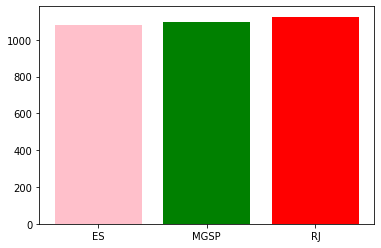

In [23]:
graph = plt.bar(estadosMedia['Estado'],estadosMedia['Média'], color=['pink','green','red'])
plt.show()

Como é possível ver, os valores obtidos são muito próximos, o que dificulta a visualização no gráfico. Alterando a escala no eixo y para logarítmica, será possível enxergar melhor essa diferença.

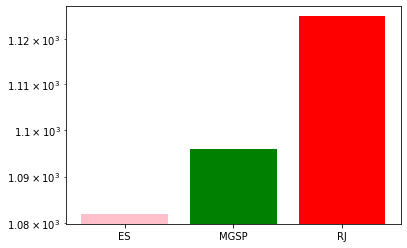

In [24]:
graph = plt.bar(estadosMedia['Estado'],estadosMedia['Média'], color=['pink','green','red'])
plt.yscale('log')
plt.show()

###**6)** Qual a média de preço de fábrica dos medicamentos tarja vermelha?

Primeiramente temos que pegar apenas os medicamentos com a Tarja Vermelha.

In [25]:
varTarjaVermelha = datasetMed[datasetMed['TARJA'] == 'Tarja Vermelha']
varTarjaVermelha

,SUBSTÂNCIA,CNPJ,LABORATÓRIO,CÓDIGO GGREM,REGISTRO,EAN 1,PRODUTO,APRESENTAÇÃO,CLASSE TERAPÊUTICA,TIPO DE PRODUTO (STATUS DO PRODUTO),...,PMC 18%,PMC 18% ALC,PMC 20%,RESTRIÇÃO HOSPITALAR,CAP,CONFAZ 87,ICMS 0%,LISTA DE CONCESSÃO DE CRÉDITO TRIBUTÁRIO (PIS/COFINS),COMERCIALIZAÇÃO 2020,TARJA
0,CEFALOTINA SODICA,04.301.884/0001-75,AUROBINDO PHARMA INDÚSTRIA FARMACÊUTICA LIMITADA,500100106155118,1516700060050,7898361881450,CEFALOTINA SÓDICA,1G PO SOL INJ CT 50 FA VD TRANS,J1D2 - CEFALOSPORINAS INJETÁVEIS,Genérico,...,NaN,NaN,NaN,Sim,Não,Não,Não,Positiva,Sim,Tarja Vermelha
1,CEFAZOLINA SÓDICA,04.301.884/0001-75,AUROBINDO PHARMA INDÚSTRIA FARMACÊUTICA LIMITADA,500100204157115,1516700030038,7898361881405,CEFAZOLINA SÓDICA,1 G PO SOL INJ CT 50 FA VD TRANS,J1D2 - CEFALOSPORINAS INJETÁVEIS,Genérico,...,NaN,NaN,NaN,Sim,Não,Não,Não,Positiva,Sim,Tarja Vermelha
2,CEFOTAXIMA SÓDICA,04.301.884/0001-75,AUROBINDO PHARMA INDÚSTRIA FARMACÊUTICA LIMITADA,500100310151117,1516700050063,7898361881412,CEFOTAXIMA SÓDICA,1 G PO SOL INJ CT 50 FA VD TRANS,J1D2 - CEFALOSPORINAS INJETÁVEIS,Genérico,...,NaN,NaN,NaN,Sim,Não,Não,Não,Positiva,Sim,Tarja Vermelha
3,CLORIDRATO DE CIPROFLOXACINO,04.301.884/0001-75,AUROBINDO PHARMA INDÚSTRIA FARMACÊUTICA LIMITADA,500100410113111,1516700070099,7898361881313,CLORIDRATO DE CIPROFLOXACINO,500 MG COM REV CT 2 BL AL PLAS TRANS X 07,J1G1 - FLUORQUINOLONAS ORAIS,Genérico,...,46.26,"46,26",47.42,Não,Não,Sim,Não,Positiva,Não,Tarja Vermelha
4,CEFALEXINA MONOIDRATADA,04.301.884/0001-75,AUROBINDO PHARMA INDÚSTRIA FARMACÊUTICA LIMITADA,500100801112111,1516700080035,7898361880019,CEFALEXINA,500 MG COM REV CT BL AL PVC/PVDC TRANS X 8,J1D1 - CEFALOSPORINAS ORAIS,Genérico,...,20.97,"20,97",21.50,Não,Não,Não,Não,Positiva,Sim,Tarja Vermelha
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27183,AMOXICILINA TRI-HIDRATADA,92.265.552/0001-40,MULTILAB INDÚSTRIA E COMÉRCIO DE PRODUTOS FARM...,525912050015706,1181900920031,7896472504138,AMOXICILINA TRIIDRATADA,"50 MG/ML PO SUS OR CT FR VD AMB X 7,5 G (150 M...",J1C1 - PENICILINAS ORAIS DE AMPLO ESPECTRO,Genérico,...,NaN,NaN,NaN,Sim,Não,Não,Não,Positiva,Não,Tarja Vermelha
27187,AMOXICILINA TRIHIDRATADA,92.265.552/0001-40,MULTILAB INDÚSTRIA E COMÉRCIO DE PRODUTOS FARM...,525906201117119,1181900910011,7896472512263,AMOXICILINA,500 MG CAP DURA CT BL AL PLAS TRANS X 15,J1C1 - PENICILINAS ORAIS DE AMPLO ESPECTRO,Genérico,...,24.76,"24,76",25.38,Não,Não,Não,Não,Positiva,Sim,Tarja Vermelha
27188,AMOXICILINA TRIHIDRATADA,92.265.552/0001-40,MULTILAB INDÚSTRIA E COMÉRCIO DE PRODUTOS FARM...,525906202113117,1181900910028,7896472512270,AMOXICILINA,500 MG CAP DURA CT BL AL PLAS TRANS X 21,J1C1 - PENICILINAS ORAIS DE AMPLO ESPECTRO,Genérico,...,29.54,"29,54",30.28,Não,Não,Não,Não,Positiva,Sim,Tarja Vermelha
27190,ACETATO DE RETINOL;COLECALCIFEROL,92.265.552/0001-40,MULTILAB INDÚSTRIA E COMÉRCIO DE PRODUTOS FARM...,525917060050704,1181901840015,7896472518807,METOSAD,50000 + 10000 UI/ML SOL OR CT FR PLAS AMB GOT ...,A11C3 - ASSOCIAÇÕES VITAMINAS A COM D,-,...,10.30,"9,29",10.60,Não,Não,Não,Não,Negativa,Não,Tarja Vermelha


Após mostrar apenas os medicamentos com tarja Vermelha, a quantidade de dados obtidos é mostrado abaixo.

In [26]:
novo = len(varTarjaVermelha.index)
print("Quantidade de Remédios com a Tarja Vermelha:",novo)

Quantidade de Remédios com a Tarja Vermelha: 21934


Agora analisando a média, mediana e moda.

In [27]:
varTarjaVermelha = datasetMed[datasetMed['TARJA'] == 'Tarja Vermelha']

mediaTarjaVermelha = varTarjaVermelha['PF 0%'].mean()
modaTarjaVermelha = varTarjaVermelha['PF 0%'].mode()
medianaTarjaVermelha = varTarjaVermelha['PF 0%'].median()
print("Média: ", round(mediaTarjaVermelha,2))
print("Moda: ", modaTarjaVermelha.tolist())
print("Mediana: ", medianaTarjaVermelha)

Média:  8467.46
Moda:  [66.1, 7197166.63]
Mediana:  73.105


Ao ver os valores acima, vemos que a média não reflete a real situação dos preços dos medicamentos. Isso pode ser visto pela moda, visto que um produto de mais de 7 milhões de reais aparece com certa frequência.
<p>Portanto, podemos dizer que os preços giram em torno de 66 reais levando em consideração a mediana e o primeiro valor da moda, sendo o segundo valor um outlier dos dados</p>

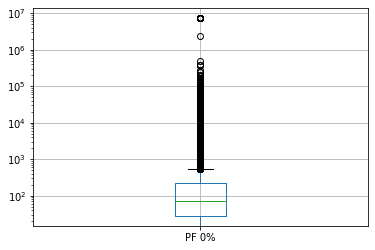

In [28]:
varTarjaVermelha.boxplot(column=['PF 0%'])
plt.yscale('log')
plt.show()

Vemos que os valores são muito dispersos, pois há diversos outliers e com grande distância dos quartis.

###**7)** Qual a média de preço de fábrica dos medicamentos tarja preta?

Em primeira análise, pegamos apenas os medicamentos com a Tarja Preta.

In [29]:
varTarjaPreta = datasetMed[datasetMed['TARJA'] == 'Tarja Preta']
varTarjaPreta

,SUBSTÂNCIA,CNPJ,LABORATÓRIO,CÓDIGO GGREM,REGISTRO,EAN 1,PRODUTO,APRESENTAÇÃO,CLASSE TERAPÊUTICA,TIPO DE PRODUTO (STATUS DO PRODUTO),...,PMC 18%,PMC 18% ALC,PMC 20%,RESTRIÇÃO HOSPITALAR,CAP,CONFAZ 87,ICMS 0%,LISTA DE CONCESSÃO DE CRÉDITO TRIBUTÁRIO (PIS/COFINS),COMERCIALIZAÇÃO 2020,TARJA
14,BROMIDRATO DE CITALOPRAM,04.301.884/0001-75,AUROBINDO PHARMA INDÚSTRIA FARMACÊUTICA LIMITADA,500102202119115,1516700180031,7898361881863,BROMIDRATO DE CITALOPRAM,20 MG COM REV CT BL AL PVC/PVDC TRANS X 28,N6A4 - ANTIDEPRESSIVOS SSRI,Genérico,...,73.50,"73,50",75.34,Não,Não,Não,Não,Positiva,Não,Tarja Preta
169,ALPRAZOLAM,04.301.884/0001-75,AUROBINDO PHARMA INDÚSTRIA FARMACÊUTICA LIMITADA,500120070035907,1516700590025,7898361885465,ALPRAZOLAM,"0,25 MG COM CT BL AL AL X 30",N5C - TRANQUILIZANTES,Genérico,...,19.41,"19,41",19.89,Não,Não,Não,Não,Positiva,Não,Tarja Preta
170,ALPRAZOLAM,04.301.884/0001-75,AUROBINDO PHARMA INDÚSTRIA FARMACÊUTICA LIMITADA,500120070036007,1516700590033,7898361885472,ALPRAZOLAM,"0,25 MG COM CT BL AL AL X 500",N5C - TRANQUILIZANTES,Genérico,...,323.48,"323,48",331.56,Não,Não,Não,Não,Positiva,Não,Tarja Preta
171,ALPRAZOLAM,04.301.884/0001-75,AUROBINDO PHARMA INDÚSTRIA FARMACÊUTICA LIMITADA,500120070036107,1516700590017,7898361885458,ALPRAZOLAM,"0,25 MG COM CT BL AL AL X 20",N5C - TRANQUILIZANTES,Genérico,...,12.91,"12,91",13.24,Não,Não,Não,Não,Positiva,Não,Tarja Preta
172,ALPRAZOLAM,04.301.884/0001-75,AUROBINDO PHARMA INDÚSTRIA FARMACÊUTICA LIMITADA,500120070036207,1516700590084,7898361885526,ALPRAZOLAM,1 MG COM CT BL AL AL X 30,N5C - TRANQUILIZANTES,Genérico,...,67.34,"67,34",69.03,Não,Não,Não,Não,Positiva,Não,Tarja Preta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26361,CLOBAZAM,10.588.595/0010-92,SANOFI MEDLEY FARMACÊUTICA LTDA.,576720030060817,1832603060018,7891058021948,URBANIL,10 MG COM CT BL AL PLAS TRANS X 20,N5C - TRANQUILIZANTES,Novo,...,17.70,"17,70",18.15,Não,Sim,Sim,Não,Positiva,Sim,Tarja Preta
26420,CLOBAZAM,10.588.595/0010-92,SANOFI MEDLEY FARMACÊUTICA LTDA.,576720050066917,1832603240016,7891058325039,FRISIUM,10 MG COM CT BL AL PLAS PVC TRANS X 20,N5C - TRANQUILIZANTES,Novo,...,21.26,"21,26",21.79,Não,Sim,Sim,Não,Positiva,Sim,Tarja Preta
26421,CLOBAZAM,10.588.595/0010-92,SANOFI MEDLEY FARMACÊUTICA LTDA.,576720050067017,1832603240024,7891058326005,FRISIUM,20 MG COM CT BL AL PLAS PVC TRANS X 20,N5C - TRANQUILIZANTES,Novo,...,39.80,"39,80",40.80,Não,Sim,Sim,Não,Positiva,Sim,Tarja Preta
26551,CLOBAZAM,10.588.595/0010-92,SANOFI MEDLEY FARMACÊUTICA LTDA.,576720070080717,1832603060026,7896185998514,URBANIL,20 MG COM CT FR VD TRANS X 20,N5C - TRANQUILIZANTES,Novo,...,30.66,"30,66",31.44,Não,Sim,Sim,Não,Positiva,Não,Tarja Preta


Após mostrar apenas os medicamentos com tarja Preta, a quantidade de dados obtidos é mostrado abaixo.

In [30]:
novo = len(varTarjaPreta.index)
print("Quantidade de Remédios com a Tarja Preta:",novo)

Quantidade de Remédios com a Tarja Preta: 551


Agora analisando a média, mediana e a moda.

In [31]:
varTarjaPreta = datasetMed[datasetMed['TARJA'] == 'Tarja Preta']
mediaTarjaPreta = varTarjaPreta['PF 0%'].mean()
modaTarjaPreta = varTarjaPreta['PF 0%'].mode()
medianaTarjaPreta = varTarjaPreta['PF 0%'].median()
desvio = varTarjaPreta['PF 0%'].std()
print("Média: ", round(mediaTarjaPreta,2))
print("Moda: ", modaTarjaPreta.tolist())
print("Mediana: ", medianaTarjaPreta)
print("Desvio: ", desvio)

Média:  185.71
Moda:  [320.41]
Mediana:  48.29
Desvio:  565.1703920586581


Ao analisar os valores acima, percebe-se que a média não reflete a real situação dos preços dos medicamentos, principalmente quando vamos analisar o desvio.

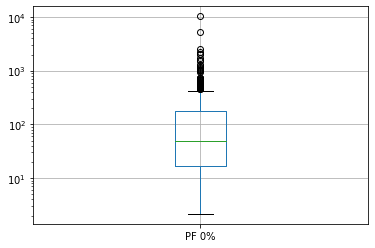

In [32]:
varTarjaPreta.boxplot(column=['PF 0%'])
plt.yscale('log')
plt.show()

Analisando o gráfico, vemos que os valores são muito dispersos, pois há diversos outliers e com grande distância dos quartis.

###**8)** Qual a quantidade de medicamentos com PIS/CONFIS positiva e negativa?

Em primeira análise, temos o total de dados com PIS/CONFIS positivo ou negativo.

In [33]:
TodosDados = len(datasetMed)
print('Quantidade de PIS/COFINS Total:',int(TodosDados))

Quantidade de PIS/COFINS Total: 27197


Agora pegando apenas o PIS/CONFIS positivos:

In [34]:
varPISCONFIS = datasetMed[datasetMed['LISTA DE CONCESSÃO DE CRÉDITO TRIBUTÁRIO (PIS/COFINS)'] == 'Positiva']
varPISCONFIS
quantidade = len(varPISCONFIS)
print("Quantidade de PIS/COFINS Positivo: ",int(quantidade))
#lab_quantidade = pd.DataFrame({'LISTA DE CONCESSÃO DE CRÉDITO TRIBUTÁRIO (PIS/COFINS)': varPISCONFIS,
#                   'Quantidade': quantidad})
#lab_quantidade

Quantidade de PIS/COFINS Positivo:  18570


Pegando apenas valores Negativos:

In [35]:
varPISCONFISNEG = datasetMed[datasetMed['LISTA DE CONCESSÃO DE CRÉDITO TRIBUTÁRIO (PIS/COFINS)'] == 'Negativa']
varPISCONFISNEG
quantidadeNEG = len(varPISCONFISNEG)
print("Quantidade de PIS/COFINS Negativo: ", int(quantidadeNEG))

Quantidade de PIS/COFINS Negativo:  8529


Em segunda análise, utilizamos um histograma.

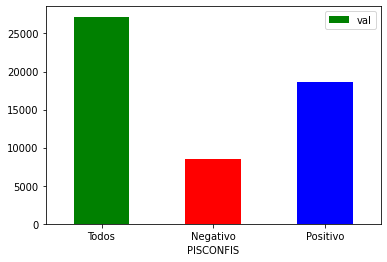

In [36]:
dff = pd.DataFrame({'PISCONFIS':['Todos', 'Negativo', 'Positivo'], 'val':[TodosDados, quantidadeNEG, quantidade]})

graph = dff.plot.bar(x='PISCONFIS', y='val', rot=0, color=['green', 'red', 'blue'] )
graph


#estadosMedia = pd.DataFrame({'LISTA DE CONCESSÃO DE CRÉDITO TRIBUTÁRIO (PIS/COFINS)': ["Positiva", "NEgativa"],'Média':[ES, MGSP, RJ]}, index=["ES", "MGSP", "RJ"])
#graph = plt.bar(estadosMedia['Estado'],estadosMedia['Média'], color=['pink','green','red'])
#plt.yscale('log')
#plt.show()

###*9)* Qual laboratório possui a lista de concessão de crédito tributário com mais medicamentos em positivo?

Analisando qual laboratorio possui a concessão de crédito tributário com mais medicamentos positivos, em primeiro lugar, recolhemos os dados de todos os laboratorios com a concessão positiva.

In [37]:
varPISCONFIS = datasetMed[datasetMed['LISTA DE CONCESSÃO DE CRÉDITO TRIBUTÁRIO (PIS/COFINS)'] == 'Positiva']
quantidade = varPISCONFIS
quantidade = quantidade.groupby('LABORATÓRIO')['LISTA DE CONCESSÃO DE CRÉDITO TRIBUTÁRIO (PIS/COFINS)'].count().tolist()
nomesLabs = sorted(varPISCONFIS['LABORATÓRIO'].unique())
nomesLabs

['1FARMA INDUSTRIA FARMACEUTICA LTDA',
 'ABBOTT LABORATÓRIOS DO BRASIL LTDA',
 'ABBVIE FARMACÊUTICA LTDA.',
 'ACCORD FARMACÊUTICA LTDA',
 'ACHÉ LABORATÓRIOS FARMACÊUTICOS S.A',
 'ALKO DO BRASIL INDUSTRIA E COMERCIO LTDA',
 'ALLERGAN PRODUTOS FARMACÊUTICOS LTDA',
 'ALTHAIA S.A INDÚSTRIA FARMACÊUTICA',
 'AMGEN BIOTECNOLOGIA DO BRASIL LTDA.',
 'ANTIBIÓTICOS DO BRASIL LTDA',
 'APSEN FARMACEUTICA S/A',
 'ARESE PHARMA LTDA',
 'ASPEN PHARMA INDÚSTRIA FARMACÊUTICA LTDA',
 'ASTELLAS FARMA BRASIL IMPORTAÇÃO E DISTRIBUIÇÃO DE MEDICAMENTOS LTDA.',
 'ASTRAZENECA DO BRASIL LTDA',
 'ATIVUS FARMACÊUTICA LTDA',
 'AUROBINDO PHARMA INDÚSTRIA FARMACÊUTICA LIMITADA',
 'AVERT LABORATÓRIOS LTDA',
 'BAXTER HOSPITALAR LTDA',
 'BAYER S.A.',
 'BEAUFOUR IPSEN FARMACÊUTICA LTDA',
 'BEKER PRODUTOS FÁRMACO HOSPITALARES LTDA',
 'BELFAR LTDA',
 'BESINS HEALTHCARE BRASIL COMERCIAL E DISTRIBUIDORA DE MEDICAMENTOS LTDA',
 'BIOGEN BRASIL PRODUTOS FARMACÊUTICOS LTDA',
 'BIOLAB FARMA GENERICOS LTDA',
 'BIOLAB SANUS FARMACÊU

Com isso, foi criada uma tabela com o nome do laboratório e a quantidade de concessão que ele tem. 

In [38]:
lab_quantidade = pd.DataFrame({'Laboratório': nomesLabs,
                   'Quantidade': quantidade})
lab_quantidade
df2 = lab_quantidade.sort_values('Quantidade', ascending=False)
df2

,Laboratório,Quantidade
65,EMS S/A,1059
4,ACHÉ LABORATÓRIOS FARMACÊUTICOS S.A,850
87,GERMED FARMACEUTICA LTDA,718
68,EUROFARMA LABORATÓRIOS S.A.,708
164,PRATI DONADUZZI & CIA LTDA,688
...,...,...
178,SILVESTRE LABS QUÍMICA E FARMACÊUTICA LTDA,1
138,MAWDSLEYS PHARMACEUTICALS DO BRASIL LTDA,1
116,LABORATÓRIO FARMACÊUTICO VITAMED LTDA,1
61,DLA PHARMACEUTICAL LTDA,1


Com isso, o laboratório que possui maior número de concessão:  

In [39]:
df2.loc[65]

Laboratório    EMS S/A
Quantidade        1059
Name: 65, dtype: object

###*10)* Qual laboratório possui a lista de concessão de crédito tributário com mais medicamentos em negativo?

Analisando qual laboratorio possui a concessão de crédito tributário com mais medicamentos positivos, em primeiro lugar, recolhemos os dados de todos os laboratorios com a concessão negativa.

In [40]:
varPISCONFIS = datasetMed[datasetMed['LISTA DE CONCESSÃO DE CRÉDITO TRIBUTÁRIO (PIS/COFINS)'] == 'Negativa']
quantidadeNEG = varPISCONFIS
quantidadeNEG = quantidadeNEG.groupby('LABORATÓRIO')['LISTA DE CONCESSÃO DE CRÉDITO TRIBUTÁRIO (PIS/COFINS)'].count().tolist()
nomesLabs = sorted(varPISCONFIS['LABORATÓRIO'].unique())
nomesLabs

['1FARMA INDUSTRIA FARMACEUTICA LTDA',
 'ABBOTT LABORATÓRIOS DO BRASIL LTDA',
 'ABBVIE FARMACÊUTICA LTDA.',
 'ACCORD FARMACÊUTICA LTDA',
 'ACHÉ LABORATÓRIOS FARMACÊUTICOS S.A',
 'AIRELA INDÚSTRIA FARMACÊUTICA LTDA.',
 'ALEXION FARMACEUTICA BRASIL IMPORTACAO E DISTRIBUICAO DE PRODUTOS E SERVICOS DE ADMINISTRACAO',
 'ALLERGAN PRODUTOS FARMACÊUTICOS LTDA',
 'ALTHAIA S.A INDÚSTRIA FARMACÊUTICA',
 'AMGEN BIOTECNOLOGIA DO BRASIL LTDA.',
 'AMRYT BRASIL COMERCIO E IMPORTACAO DE MEDICAMENTOS LTDA',
 'APIS FLORA INDUSTRIAL  E COMERCIAL LTDA',
 'APSEN FARMACEUTICA S/A',
 'ARESE PHARMA LTDA',
 'AS ERVAS CURAM INDUSTRIA FARMACEUTICA LTDA',
 'ASPEN PHARMA INDÚSTRIA FARMACÊUTICA LTDA',
 'ASTELLAS FARMA BRASIL IMPORTAÇÃO E DISTRIBUIÇÃO DE MEDICAMENTOS LTDA.',
 'ASTRAZENECA DO BRASIL LTDA',
 'ATIVUS FARMACÊUTICA LTDA',
 'AUROBINDO PHARMA INDÚSTRIA FARMACÊUTICA LIMITADA',
 'AVERT LABORATÓRIOS LTDA',
 'BAXTER HOSPITALAR LTDA',
 'BAYER S.A.',
 'BEAUFOUR IPSEN FARMACÊUTICA LTDA',
 'BELFAR LTDA',
 'BESINS H

Com isso, foi criada uma tabela com o nome dos laboratórios e a quantidade de concessão que ele tem.

In [41]:
lab_quantidade = pd.DataFrame({'Laboratório': nomesLabs,
                   'Quantidade': quantidadeNEG})
lab_quantidade
df3 = lab_quantidade.sort_values('Quantidade', ascending=False)
df3

,Laboratório,Quantidade
67,EMS S/A,515
4,ACHÉ LABORATÓRIOS FARMACÊUTICOS S.A,333
56,COSMED INDUSTRIA DE COSMETICOS E MEDICAMENTOS ...,316
197,SANOFI MEDLEY FARMACÊUTICA LTDA.,313
146,LEGRAND PHARMA INDÚSTRIA FARMACÊUTICA LTDA,275
...,...,...
162,MOKSHA8 BRASIL INDUSTRIA E COMERCIO DE MEDICAM...,1
93,GLOBAL REGULATORY PARTNERS BRASIL EIRELI,1
188,PINUS INDUSTRIA QUIMICA E FARMACEUTICA LTDA,1
155,MEDA PHARMA IMPORTAÇÃO E EXPORTAÇÃO DE PRODUTO...,1


O Laboratório com maior numero de concessão Negativa é:

In [42]:
df3.loc[67]

Laboratório    EMS S/A
Quantidade         515
Name: 67, dtype: object

12- Qual a porcentagem de remédios que possuem e não possuem restrição hospitalar?

In [43]:
restricaoNegada = datasetMed[datasetMed['RESTRIÇÃO HOSPITALAR'] == 'Não']
restricaoAceita = datasetMed[datasetMed['RESTRIÇÃO HOSPITALAR'] == 'Sim']
Total = datasetMed['RESTRIÇÃO HOSPITALAR'].count()


restricaoNegada = restricaoNegada['RESTRIÇÃO HOSPITALAR'].count()
restricaoAceita = restricaoAceita['RESTRIÇÃO HOSPITALAR'].count()
restricaoAceita


porcNegada = (restricaoNegada/Total)*100
porcAceita = (restricaoAceita/Total)*100

print('Porcentagem Negada = {:.2f}% '.format(porcNegada))
print('Porcentagem Aceita = {:.2f}%'.format(porcAceita))


Porcentagem Negada = 83.26% 
Porcentagem Aceita = 16.74%


13- Em 2020, quais os 3 medicamentos mais comercializados?

In [44]:
varPISCONFIS = datasetMed[datasetMed['COMERCIALIZAÇÃO 2020'] == 'Sim']
quantidadeNEG = varPISCONFIS
quantidadeNEG = quantidadeNEG.groupby('COMERCIALIZAÇÃO 2020')['PRODUTO'].count().tolist()
nomesLabs = (varPISCONFIS['PRODUTO'].unique())
nomesLabs

array(['CEFALOTINA SÓDICA', 'CEFAZOLINA SÓDICA', 'CEFOTAXIMA SÓDICA', ...,
       'CEFAGEL', 'AMPICILAB', 'OCYLIN'], dtype=object)

14 - Qual a frequência de status dos medicamentos?

In [45]:
datasetMed['TIPO DE PRODUTO (STATUS DO PRODUTO)'].unique()

array(['Genérico', 'Novo', 'Biológico', 'Similar', 'Biológicos',
       'Específico', 'Fitoterápico', '-(*)', 'Biológico Novo',
       'Produto de Terapia Avançada', 'Radiofármaco', '    -     '],
      dtype=object)

15- Qual a média de preço de fábrica sem imposto dos antidepressivos?

In [46]:
precoAnti = datasetMed[datasetMed['TIPO DE PRODUTO (STATUS DO PRODUTO)'] == 'antidepressivo']
precoAnti = precoAnti.count()
precoAnti

SUBSTÂNCIA                                               0
CNPJ                                                     0
LABORATÓRIO                                              0
CÓDIGO GGREM                                             0
REGISTRO                                                 0
EAN 1                                                    0
PRODUTO                                                  0
APRESENTAÇÃO                                             0
CLASSE TERAPÊUTICA                                       0
TIPO DE PRODUTO (STATUS DO PRODUTO)                      0
REGIME DE PREÇO                                          0
PF Sem Impostos                                          0
PF 0%                                                    0
PF 12%                                                   0
PF 17%                                                   0
PF 17% ALC                                               0
PF 17,5%                                                

REGRA DE ASSOCIAÇÃO

In [47]:
datasetMed.columns

Index(['SUBSTÂNCIA', 'CNPJ', 'LABORATÓRIO', 'CÓDIGO GGREM', 'REGISTRO',
       'EAN 1', 'PRODUTO', 'APRESENTAÇÃO', 'CLASSE TERAPÊUTICA',
       'TIPO DE PRODUTO (STATUS DO PRODUTO)', 'REGIME DE PREÇO',
       'PF Sem Impostos', 'PF 0%', 'PF 12%', 'PF 17%', 'PF 17% ALC',
       'PF 17,5%', 'PF 17,5% ALC', 'PF 18%', 'PF 18% ALC', 'PF 20%', 'PMC 0%',
       'PMC 12%', 'PMC 17%', 'PMC 17% ALC', 'PMC 17,5%', 'PMC 17,5% ALC',
       'PMC 18%', 'PMC 18% ALC', 'PMC 20%', 'RESTRIÇÃO HOSPITALAR', 'CAP',
       'CONFAZ 87', 'ICMS 0%',
       'LISTA DE CONCESSÃO DE CRÉDITO TRIBUTÁRIO (PIS/COFINS)',
       'COMERCIALIZAÇÃO 2020', 'TARJA'],
      dtype='object')

In [63]:
coluna_interesse = ['LABORATÓRIO', 'PRODUTO', 'PF Sem Impostos', 'PF 0%', 'PF 12%', 'PF 17%', 'PF 17% ALC',
       'PF 17,5%', 'PF 17,5% ALC', 'PF 18%', 'PF 18% ALC', 'PF 20%', 'COMERCIALIZAÇÃO 2020', 'TARJA']

In [64]:
remediosComercializado = datasetMed[coluna_interesse]
remediosComercializado

,LABORATÓRIO,PRODUTO,PF Sem Impostos,PF 0%,PF 12%,PF 17%,PF 17% ALC,"PF 17,5%","PF 17,5% ALC",PF 18%,PF 18% ALC,PF 20%,COMERCIALIZAÇÃO 2020,TARJA
0,AUROBINDO PHARMA INDÚSTRIA FARMACÊUTICA LIMITADA,CEFALOTINA SÓDICA,"262,28",262.28,"298,05","316,00","316,00","317,92","317,92","319,85","319,85","327,85",Sim,Tarja Vermelha
1,AUROBINDO PHARMA INDÚSTRIA FARMACÊUTICA LIMITADA,CEFAZOLINA SÓDICA,"517,93",517.93,"588,56","624,01","624,01","627,79","627,79","631,62","631,62","647,41",Sim,Tarja Vermelha
2,AUROBINDO PHARMA INDÚSTRIA FARMACÊUTICA LIMITADA,CEFOTAXIMA SÓDICA,"1917,29",1917.29,"2178,74","2309,99","2309,99","2323,99","2323,99","2338,16","2338,16","2396,61",Sim,Tarja Vermelha
3,AUROBINDO PHARMA INDÚSTRIA FARMACÊUTICA LIMITADA,CLORIDRATO DE CIPROFLOXACINO,"27,44",27.44,"31,18","33,06","33,06","33,26","33,26","33,46","33,46","34,30",Não,Tarja Vermelha
4,AUROBINDO PHARMA INDÚSTRIA FARMACÊUTICA LIMITADA,CEFALEXINA,"12,44",12.44,"14,14","14,99","14,99","15,08","15,08","15,17","15,17","15,55",Sim,Tarja Vermelha
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27192,MULTILAB INDÚSTRIA E COMÉRCIO DE PRODUTOS FARM...,METOSAD,"16,55",18.54,"21,42","22,91","19,94","23,07","20,06","23,23","20,19","23,91",Não,Sem Tarja
27193,MULTILAB INDÚSTRIA E COMÉRCIO DE PRODUTOS FARM...,ACETATO DE DEXAMETASONA,"7,30",7.30,"8,30","8,80","8,80","8,85","8,85","8,90","8,90","9,13",Não,Sem Tarja
27194,MULTILAB INDÚSTRIA E COMÉRCIO DE PRODUTOS FARM...,CORTITOP,"11,30",11.30,"12,84","13,61","13,61","13,70","13,70","13,78","13,78","14,13",Não,Sem Tarja
27195,MULTILAB INDÚSTRIA E COMÉRCIO DE PRODUTOS FARM...,CORTITOP,"22,49",22.49,"25,56","27,10","27,10","27,26","27,26","27,43","27,43","28,11",Não,Sem Tarja


In [65]:
#remediosComercializado = remediosComercializado[remediosComercializado['COMERCIALIZAÇÃO 2020'] == 'Sim']
remediosComercializado

,LABORATÓRIO,PRODUTO,PF Sem Impostos,PF 0%,PF 12%,PF 17%,PF 17% ALC,"PF 17,5%","PF 17,5% ALC",PF 18%,PF 18% ALC,PF 20%,COMERCIALIZAÇÃO 2020,TARJA
0,AUROBINDO PHARMA INDÚSTRIA FARMACÊUTICA LIMITADA,CEFALOTINA SÓDICA,"262,28",262.28,"298,05","316,00","316,00","317,92","317,92","319,85","319,85","327,85",Sim,Tarja Vermelha
1,AUROBINDO PHARMA INDÚSTRIA FARMACÊUTICA LIMITADA,CEFAZOLINA SÓDICA,"517,93",517.93,"588,56","624,01","624,01","627,79","627,79","631,62","631,62","647,41",Sim,Tarja Vermelha
2,AUROBINDO PHARMA INDÚSTRIA FARMACÊUTICA LIMITADA,CEFOTAXIMA SÓDICA,"1917,29",1917.29,"2178,74","2309,99","2309,99","2323,99","2323,99","2338,16","2338,16","2396,61",Sim,Tarja Vermelha
3,AUROBINDO PHARMA INDÚSTRIA FARMACÊUTICA LIMITADA,CLORIDRATO DE CIPROFLOXACINO,"27,44",27.44,"31,18","33,06","33,06","33,26","33,26","33,46","33,46","34,30",Não,Tarja Vermelha
4,AUROBINDO PHARMA INDÚSTRIA FARMACÊUTICA LIMITADA,CEFALEXINA,"12,44",12.44,"14,14","14,99","14,99","15,08","15,08","15,17","15,17","15,55",Sim,Tarja Vermelha
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27192,MULTILAB INDÚSTRIA E COMÉRCIO DE PRODUTOS FARM...,METOSAD,"16,55",18.54,"21,42","22,91","19,94","23,07","20,06","23,23","20,19","23,91",Não,Sem Tarja
27193,MULTILAB INDÚSTRIA E COMÉRCIO DE PRODUTOS FARM...,ACETATO DE DEXAMETASONA,"7,30",7.30,"8,30","8,80","8,80","8,85","8,85","8,90","8,90","9,13",Não,Sem Tarja
27194,MULTILAB INDÚSTRIA E COMÉRCIO DE PRODUTOS FARM...,CORTITOP,"11,30",11.30,"12,84","13,61","13,61","13,70","13,70","13,78","13,78","14,13",Não,Sem Tarja
27195,MULTILAB INDÚSTRIA E COMÉRCIO DE PRODUTOS FARM...,CORTITOP,"22,49",22.49,"25,56","27,10","27,10","27,26","27,26","27,43","27,43","28,11",Não,Sem Tarja


In [66]:
df_rules = remediosComercializado[['TARJA', 'PF 12%']]

In [67]:
df_transactions = pd.get_dummies(df_rules)

In [68]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [69]:
frequent_itemsets = apriori(df_transactions, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.806486,(TARJA_Tarja Vermelha)
